# Amazon Reviews Analysis

## Load the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rev = pd.read_csv('Reviews.csv', usecols = ['Id', 'Score', 'Summary', 'Text'], index_col = 'Id')

## Examining the data

In [3]:
rev.head()

,Score,Summary,Text
Id,,,
1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,4,"""Delight"" says it all",This is a confection that has been around a fe...
4,2,Cough Medicine,If you are looking for the secret ingredient i...
5,5,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
rev.shape

(568454, 3)

In [9]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568454 entries, 1 to 568454
Data columns (total 3 columns):
Score      568454 non-null int64
Summary    568427 non-null object
Text       568454 non-null object
dtypes: int64(1), object(2)
memory usage: 13.0+ MB


## Sentiment Analysis|
### Using the Score column
It seems that the reviews are good overall (an average of 4.18) and most of them are in the 4 or 5 mark (78%)

In [13]:
rev['Score'].describe()

count    568454.000000
mean          4.183199
std           1.310436
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Score, dtype: float64

In [16]:
rev['Score'].value_counts(normalize = True)

5    0.638789
4    0.141885
1    0.091948
3    0.075010
2    0.052368
Name: Score, dtype: float64

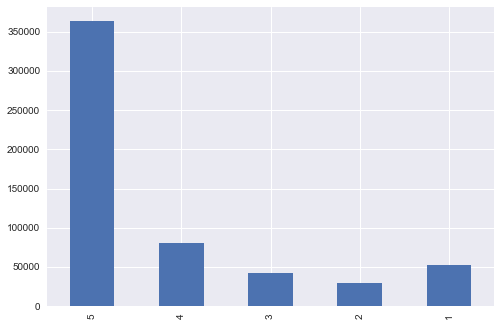

In [13]:
plt.style.use('seaborn')
rev['Score'].value_counts().sort_index(ascending=False).plot.bar()

### Using the text columns
First let's try to improve the lists by taking a look at the 200 most common words in the text columns

In [3]:
words = dict()
for i in range(rev.shape[0]-1):
    text = rev.iloc[i][['Summary', 'Text']].str.cat(sep = ' ')
    text = ''.join('' if letter in ('.',',',':','(',')','/','<','>', '-') or letter.isdigit() else letter for letter in text)
    for word in text.split():
        words.setdefault(word,0)
        words[word] += 1

In [5]:
sorted(words.items(),reverse = True, key = lambda x: x[1])[:200]

[('the', 1672897),
 ('I', 1471699),
 ('and', 1275165),
 ('a', 1212573),
 ('to', 1018209),
 ('of', 811950),
 ('it', 762890),
 ('is', 741607),
 ('for', 564592),
 ('in', 533231),
 ('this', 525390),
 ('that', 417549),
 ('my', 378180),
 ('but', 352326),
 ('with', 350970),
 ('have', 342531),
 ('are', 321750),
 ('was', 313887),
 ('not', 309798),
 ('you', 303070),
 ('on', 267874),
 ('as', 265943),
 ('br', 264674),
 ('like', 256069),
 ('The', 234875),
 ('so', 214252),
 ('they', 207032),
 ('them', 202019),
 ('good', 199202),
 ('be', 188282),
 ('these', 180877),
 ('or', 177944),
 ('at', 175029),
 ('taste', 170115),
 ('coffee', 157612),
 ('This', 157455),
 ('just', 156965),
 ('one', 154873),
 ('very', 151947),
 ('product', 148662),
 ('It', 148606),
 ('great', 148465),
 ('from', 145565),
 ('flavor', 144979),
 ('all', 140255),
 ('can', 134680),
 ('more', 131204),
 ('has', 130469),
 ('tea', 128041),
 ('me', 125463),
 ('had', 125126),
 ('food', 123942),
 ('will', 120875),
 ('would', 119598),
 ('than',

Based on those words we can add some keywords to our lists

In [9]:
pos_word_list = ['good', 'excellent', 'loving', 'love', 'tasty', 'approve', 'delicious', 'delight', 'perfect', 'wow', 'like','best', 'great', 'better', 'nice', 'loves', 'healthy']
neg_word_list = ['bad', 'horrible', 'disgusting', 'disgust', 'disappoints', 'disappointing', 'disappointment', 'worse', 'worst', 'hate',"don't"]

Define a function that would find and compare the positive and negative keywords in review's text & summary

In [7]:
def check_text(row):
    full_text = str(row[1]) + ' ' + str(row[2])
    words = ''.join('' if letter in ('.',',',':','(',')','/','<','>') or letter.isdigit() else letter for letter in full_text).split()
    pos_count, neg_count = (0,0)
    for word in words:
        if word.lower() in pos_word_list:
            pos_count += 1
        elif word.lower() in neg_word_list:
            neg_count += 1
    return 'Positive' if pos_count - neg_count > 0 else 'Negative' if pos_count - neg_count < 0 else 'Natural'

Apply function to entire dataframe

In [10]:
rev['Sentiment Rank'] = rev.apply(axis = 1, func=check_text)

In [7]:
rev.head()

,Score,Summary,Text,Sentiment Rank
Id,,,,
1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
2,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Natural
3,4,"""Delight"" says it all",This is a confection that has been around a fe...,Natural
4,2,Cough Medicine,If you are looking for the secret ingredient i...,Positive
5,5,Great taffy,Great taffy at a great price. There was a wid...,Natural


Inspect the ratio by our new `Sentiment Rank` column

In [11]:
rev['Sentiment Rank'].value_counts(normalize = True)

Positive    0.813645
Natural     0.150378
Negative    0.035977
Name: Sentiment Rank, dtype: float64

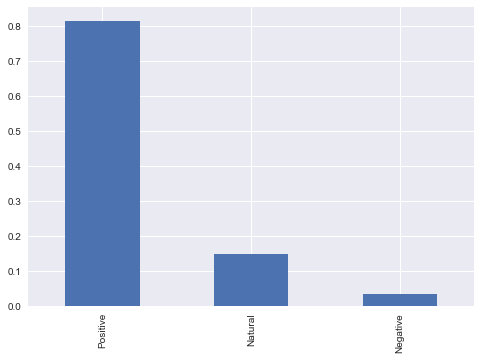

In [14]:
rev['Sentiment Rank'].value_counts(normalize = True).plot.bar()

If we refer to the `score` column as a measure of positive or negative sentiment, clearly the keyword lists are not comprehensive enough and probably should be refined and expanded even more

In [15]:
rev.pivot_table(index = 'Sentiment Rank', columns = 'Score', aggfunc='size')

Score,1,2,3,4,5
Sentiment Rank,,,,,
Natural,19071,8109,9066,9233,40004
Negative,8906,2593,2354,1805,4793
Positive,24291,19067,31220,69617,318325


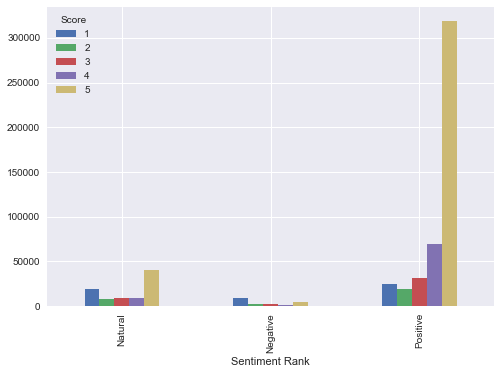

In [16]:
rev.pivot_table(index = 'Sentiment Rank', columns = 'Score', aggfunc='size').plot.bar()